# Titanic with ML and DL

# imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data

In [2]:
df = pd.read_csv('titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### preprocessing

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Droping & filling

In [4]:
#### AGE --- Fill the null values with mean or mode
averAge = df['Age'].mean()
df['Age'].fillna(averAge, inplace=True)

#### Embarked ---- Fill the null
embarMode = df['Embarked'].mode()
df['Embarked'].fillna(embarMode[0], inplace=True)

#### Drop Cabin col
df = df.drop(columns=['Cabin'], axis=1)

# Data Analysis and Visual

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

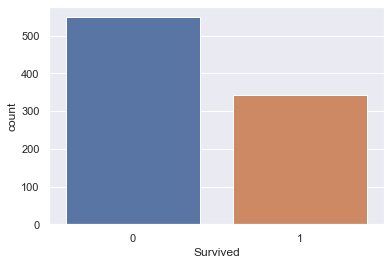

In [6]:
sns.countplot(data=df, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

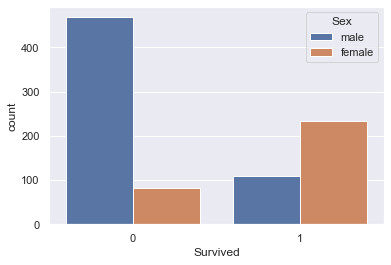

In [7]:
sns.countplot(data=df, x='Survived', hue='Sex')

In [8]:
##### one Encode the sex col
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

##### two separet the target col form the df

# Create X, y

In [9]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = df['Survived']

# Split the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train.shape, y_train.shape

((712, 7), (712,))

# Train the Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### train the model
LGmodel = LogisticRegression()
LGmodel.fit(X_train, y_train)

#### prediction
prediX_trainData = LGmodel.predict(X_train)

#### accuracey 
acc = accuracy_score(y_train, prediX_trainData)
print(acc)

0.8075842696629213


/Users/tesfalemhaile/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Test the Model

In [12]:
#### prediction
prediX_testData = LGmodel.predict(X_test)

#### accuracey 
acc = accuracy_score(y_test, prediX_testData)
print(acc)

0.7821229050279329


In [13]:
from sklearn.metrics import confusion_matrix
conMatri = confusion_matrix(y_test, prediX_testData)
conMatri

array([[91,  9],
       [30, 49]])

# ===================== ANN ===========================

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Convert the DF to array then to tensor..... in order to be fit to the model

In [15]:
#### X_train must be converted from DataFrame to Tensor
Xarray = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1).values  ### independent features
yArray = df['Survived'].values ### dependent features

X_trainArr, X_testArr, y_trainArr, y_testArr = train_test_split(
                                                Xarray, yArray, 
                                                test_size=.2, 
                                                random_state=123 )

X_trainTensor = torch.FloatTensor(X_trainArr)
y_trainTensor = torch.LongTensor(y_trainArr)

X_testTensor = torch.FloatTensor(X_testArr)
y_testTensor = torch.LongTensor(y_testArr)

X_trainTensor.shape

torch.Size([712, 7])

In [16]:
class ANN(nn.Module):
    
    def __init__(self, input_feature=7, hidden1=20, hidden2=20, output_feature=2):
        super(ANN, self).__init__()

        self.fc1 = nn.Linear(input_feature, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, output_feature)
        
    def forward(self, x):
        out = F.relu(x)
        out = self.fc1(out)
        
        out = F.relu(out)
        out = self.fc2(out)
        
        out = self.out(out)
        return out
    
ANN_model = ANN()
ANN_model
        
        

ANN(
  (fc1): Linear(in_features=7, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

# Loss & optimizer

In [17]:
loss_func = nn.CrossEntropyLoss()
optim = torch.optim.Adam(ANN_model.parameters(), lr=0.001)

# Calcu the Loss

In [26]:
allLosses = []
epochs = 500

for ix in range(epochs):
    score = ANN_model(X_trainTensor)
    loss = loss_func(score, y_trainTensor)
    optim.zero_grad()
    loss.backward()
    optim.step()
    allLosses.append(loss.item())
    if ix % 100 == 0:
        print(f"Loss-error: {loss}")


Loss-error: 0.3978073000907898
Loss-error: 0.39539462327957153
Loss-error: 0.3934013247489929
Loss-error: 0.39196160435676575
Loss-error: 0.3909990191459656


Text(0.5, 0, 'epoch')

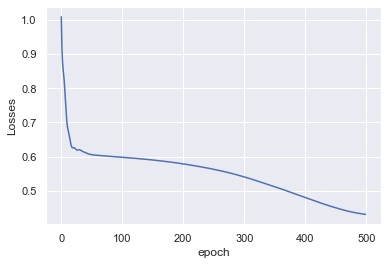

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), allLosses)
plt.ylabel('Losses')
plt.xlabel('epoch')

In [20]:
X_testTensor

tensor([[ 3.0000,  1.0000,  1.0000,  ...,  1.0000, 11.1333,  0.0000],
        [ 3.0000,  0.0000, 29.6991,  ...,  0.0000,  7.2292,  1.0000],
        [ 1.0000,  0.0000, 30.0000,  ...,  0.0000, 27.7500,  1.0000],
        ...,
        [ 2.0000,  0.0000,  1.0000,  ...,  2.0000, 37.0042,  1.0000],
        [ 3.0000,  0.0000, 29.6991,  ...,  0.0000,  7.2250,  1.0000],
        [ 2.0000,  0.0000, 27.0000,  ...,  0.0000, 13.0000,  0.0000]])

In [21]:
### as long as our loss value is reducing we're good to go 

corr_pred = []
with torch.no_grad():
    for x in X_testTensor:
        scoreTest = ANN_model(x)
        corr_pred.append(scoreTest.argmax().item())
print(corr_pred)
    
        

[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]


# Confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

con_matr = confusion_matrix(corr_pred, y_testTensor)
con_matr

array([[95, 13],
       [19, 52]])

Text(0.5, 12.5, 'Predicted-value')

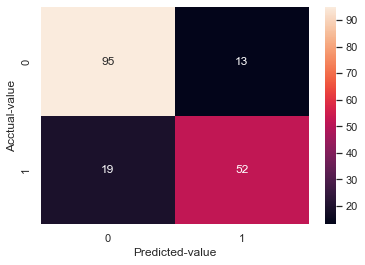

In [23]:
import seaborn as sns
sns.heatmap(con_matr, annot=True)
plt.ylabel('Acctual-value')
plt.xlabel('Predicted-value')

In [24]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_testTensor, corr_pred)
acc

0.8212290502793296